<a href="https://colab.research.google.com/github/Felgaba/HSE_DS_MasterTrack/blob/main/mobile_price_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## [Mobile Price Classification](https://www.kaggle.com/datasets/iabhishekofficial/mobile-price-classification)

## Input

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
! pip install -q pyspark

     |████████████████████████████████| 281.3 MB 42 kB/s 
     |████████████████████████████████| 199 kB 49.0 MB/s 


In [ ]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.getOrCreate()

In [ ]:
import pyspark.sql.functions as F
# File location and type
file_train = '/content/drive/MyDrive/Programming/m5-forecasting-accuracy/data_mobile/train.csv'
file_type = "csv"

# CSV options
infer_schema = "true" # try to guess variable's type
first_row_is_header = "true"
delimiter = ","

# The applied options are for CSV files. For other file types, these will be ignored.
df_train = spark.read.format(file_type) \
  .option("inferSchema", infer_schema) \
  .option("header", first_row_is_header) \
  .option("sep", delimiter) \
  .load(file_train)

In [ ]:
df_train.limit(10).toPandas()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
5,1859,0,0.5,1,3,0,22,0.7,164,1,...,1004,1654,1067,17,1,10,1,0,0,1
6,1821,0,1.7,0,4,1,10,0.8,139,8,...,381,1018,3220,13,8,18,1,0,1,3
7,1954,0,0.5,1,0,0,24,0.8,187,4,...,512,1149,700,16,3,5,1,1,1,0
8,1445,1,0.5,0,0,0,53,0.7,174,7,...,386,836,1099,17,1,20,1,0,0,0
9,509,1,0.6,1,2,1,9,0.1,93,5,...,1137,1224,513,19,10,12,1,0,0,0


In [ ]:
LABEL_COL="price_range"
FEATURES_COL= [col for col in df_train.columns if col != LABEL_COL]

In [ ]:
df_train.describe(FEATURES_COL).toPandas()

,summary,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,count,2000,2000,2000,2000,2000,2000,2000,2000,2000,...,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000
1,mean,1238.5185,0.495,1.5222499999999983,0.5095,4.3095,0.5215,32.0465,0.5017500000000017,140.249,...,9.9165,645.108,1251.5155,2124.213,12.3065,5.767,11.011,0.7615,0.503,0.507
2,stddev,439.4182060835313,0.5001000400170073,0.816004208895068,0.5000347661750049,4.341443747983898,0.49966246736236364,18.145714955206856,0.2884155496235117,35.39965489638834,...,6.064314941347778,443.78081080643824,432.1994469463379,1084.7320436099492,4.213245004356303,4.356397605826408,5.463955197766688,0.426272922318731,0.5001160445626741,0.5000760322381088
3,min,501,0,0.5,0,0,0,2,0.1,80,...,0,0,500,256,5,0,2,0,0,0
4,max,1998,1,3.0,1,19,1,64,1.0,200,...,20,1960,1998,3998,19,18,20,1,1,1


In [ ]:
df_train[FEATURES_COL].summary().toPandas()

,summary,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,count,2000,2000,2000,2000,2000,2000,2000,2000,2000,...,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000
1,mean,1238.5185,0.495,1.5222499999999983,0.5095,4.3095,0.5215,32.0465,0.5017500000000017,140.249,...,9.9165,645.108,1251.5155,2124.213,12.3065,5.767,11.011,0.7615,0.503,0.507
2,stddev,439.4182060835313,0.5001000400170073,0.816004208895068,0.5000347661750049,4.341443747983898,0.49966246736236364,18.145714955206856,0.2884155496235117,35.39965489638834,...,6.064314941347778,443.78081080643824,432.1994469463379,1084.7320436099492,4.213245004356303,4.356397605826408,5.463955197766688,0.426272922318731,0.5001160445626741,0.5000760322381088
3,min,501,0,0.5,0,0,0,2,0.1,80,...,0,0,500,256,5,0,2,0,0,0
4,25%,851,0,0.7,0,1,0,16,0.2,109,...,5,282,874,1206,9,2,6,1,0,0
5,50%,1225,0,1.5,1,3,1,32,0.5,141,...,10,564,1247,2146,12,5,11,1,1,1
6,75%,1615,1,2.2,1,7,1,48,0.8,170,...,15,947,1633,3064,16,9,16,1,1,1
7,max,1998,1,3.0,1,19,1,64,1.0,200,...,20,1960,1998,3998,19,18,20,1,1,1


In [ ]:
!pip install pyspark_dist_explore

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from pyspark_dist_explore import Histogram, hist, distplot

In [ ]:
# Create some selections on this data
filtered_by_price_0 = df_train.filter(F.col('price_range') == 0)
filtered_by_price_1 = df_train.filter(F.col('price_range') == 1)
filtered_by_price_2 = df_train.filter(F.col('price_range') == 2)
filtered_by_price_3 = df_train.filter(F.col('price_range') == 3)

In [ ]:
ram_0 = filtered_by_price_0.select(F.col('ram').alias('ram_0'))
ram_1 = filtered_by_price_1.select(F.col('ram').alias('ram_1'))
ram_2 = filtered_by_price_2.select(F.col('ram').alias('ram_2'))
ram_3 = filtered_by_price_3.select(F.col('ram').alias('ram_3'))

In [ ]:
# ram_0.limit(10).toPandas()

In [ ]:
import matplotlib.pyplot as plt

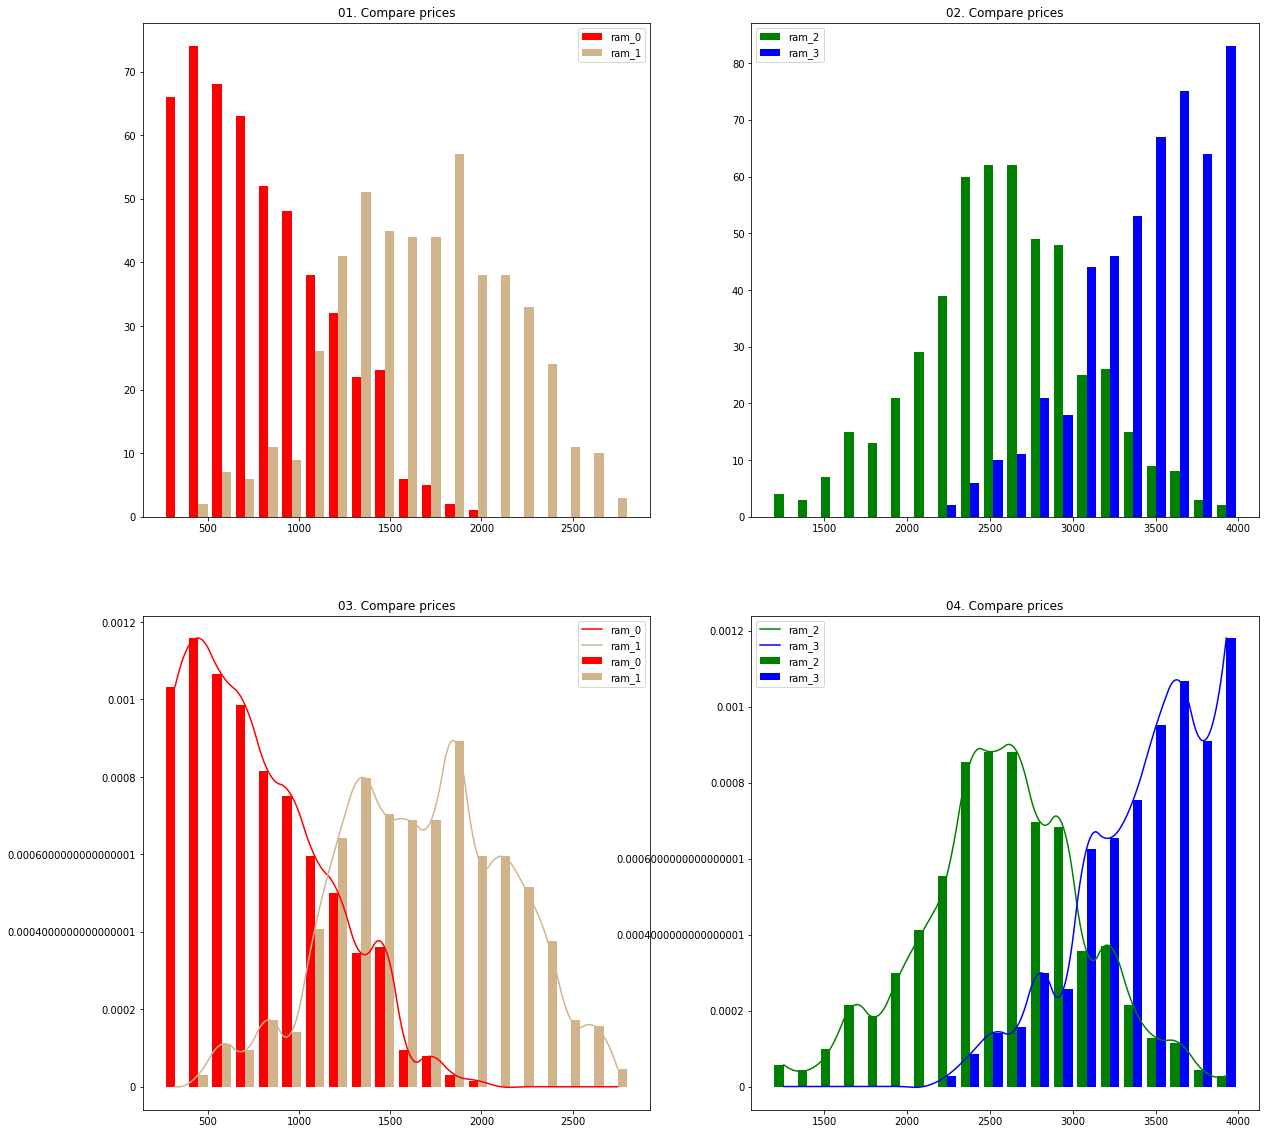

In [ ]:
#Create the plots
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_size_inches(20, 20)

# Use the hist function to plot histograms on the Axes
hist(axes[0, 0], [ram_0, ram_1], bins = 20, color=['red', 'tan'])
axes[0, 0].set_title('01. Compare prices')
axes[0, 0].legend()

# Use the hist function to plot histograms on the Axes
hist(axes[0, 1], [ram_2, ram_3], bins = 20, color=['green', 'blue'])
axes[0, 1].set_title('02. Compare prices')
axes[0, 1].legend()

# Use the distplot function to plot (scaled) histograms + density plots on the Axes
distplot(axes[1, 0], [ram_0, ram_1], bins=20, color=['red', 'tan'])
axes[1, 0].set_title('03. Compare prices')
axes[1, 0].legend()

distplot(axes[1, 1], [ram_2, ram_3], bins=20, color=['green', 'blue'])
axes[1, 1].set_title('04. Compare prices')
axes[1, 1].legend()

In [ ]:
df_train, df_val = df_train.randomSplit([0.7, 0.3], 42)

df_train.cache()
df_val.cache()

DataFrame[battery_power: int, blue: int, clock_speed: double, dual_sim: int, fc: int, four_g: int, int_memory: int, m_dep: double, mobile_wt: int, n_cores: int, pc: int, px_height: int, px_width: int, ram: int, sc_h: int, sc_w: int, talk_time: int, three_g: int, touch_screen: int, wifi: int, price_range: int]

In [ ]:
from pyspark.ml import Pipeline
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import LinearRegression

assembler = VectorAssembler(inputCols=FEATURES_COL, outputCol='features')
lr = LinearRegression(featuresCol='features', labelCol=LABEL_COL, maxIter=10)

p = Pipeline(stages=[assembler, lr])

In [ ]:
# p.fit(df_train).transform(df_train).limit(10).toPandas()

In [ ]:
pipeline = p.fit(df_train)
lr_model = pipeline.stages[-1]

summary = lr_model.summary
print("RMSE:\t%.2f\nR2:\t%.2f" % (summary.rootMeanSquaredError, summary.r2))

RMSE:	0.32
R2:	0.92


In [ ]:
df_val

DataFrame[battery_power: int, blue: int, clock_speed: double, dual_sim: int, fc: int, four_g: int, int_memory: int, m_dep: double, mobile_wt: int, n_cores: int, pc: int, px_height: int, px_width: int, ram: int, sc_h: int, sc_w: int, talk_time: int, three_g: int, touch_screen: int, wifi: int, price_range: int]

In [ ]:
from pyspark.ml.evaluation import RegressionEvaluator

predictions = pipeline.transform(df_val)

rmse_evaluator = RegressionEvaluator(predictionCol="prediction", labelCol=LABEL_COL, metricName="rmse")
r2_evaluator = RegressionEvaluator(predictionCol="prediction", labelCol=LABEL_COL, metricName="r2")

print("RMSE:\t%.2f\nR2:\t%.2f" % (rmse_evaluator.evaluate(predictions), r2_evaluator.evaluate(predictions)))

RMSE:	0.32
R2:	0.92


In [ ]:
from pyspark.ml.tuning import ParamGridBuilder, TrainValidationSplit

param_grid = (ParamGridBuilder()
              .addGrid(lr.regParam, [0.1, 0.01])
              .addGrid(lr.fitIntercept, [False, True])
              .addGrid(lr.elasticNetParam, [0.0, 0.5, 1.0])
              .build()
             )

print("Param grid size: %d" % len(param_grid))

tvs = TrainValidationSplit(estimator=p,
                           estimatorParamMaps=param_grid,
                           evaluator=rmse_evaluator,
                           trainRatio=0.8) # 0.8 : 0.2 - train : test

tuned_model = tvs.fit(df_train)
tuned_predictions = tuned_model.transform(df_val)

print("RMSE:\t%.2f\nR2:\t%.2f" % (rmse_evaluator.evaluate(tuned_predictions), r2_evaluator.evaluate(tuned_predictions)))

Param grid size: 12
RMSE:	0.32
R2:	0.92


In [ ]:
df_train.select('price_range').distinct().toPandas()

,price_range
0,1
1,3
2,2
3,0


In [ ]:
df_train.groupBy("price_range").avg("ram").show()

+-----------+------------------+
|price_range|          avg(ram)|
+-----------+------------------+
|          1|1696.5218579234972|
|          3|3441.4204545454545|
|          2|2612.4835164835163|
|          0| 801.8379120879121|
+-----------+------------------+



## Logistic Regression

In [ ]:
[('scaled_' + f) for f in FEATURES_COL]

['scaled_battery_power',
 'scaled_blue',
 'scaled_clock_speed',
 'scaled_dual_sim',
 'scaled_fc',
 'scaled_four_g',
 'scaled_int_memory',
 'scaled_m_dep',
 'scaled_mobile_wt',
 'scaled_n_cores',
 'scaled_pc',
 'scaled_px_height',
 'scaled_px_width',
 'scaled_ram',
 'scaled_sc_h',
 'scaled_sc_w',
 'scaled_talk_time',
 'scaled_three_g',
 'scaled_touch_screen',
 'scaled_wifi']

In [ ]:
va1 = [VectorAssembler(inputCols=[f], outputCol=('vec_' + f)) for f in FEATURES_COL]

In [ ]:
from pyspark.ml.feature import StandardScaler
from pyspark.ml.classification import LogisticRegression

In [ ]:
# Stage 1: 
#   [VA([f1]), VA([f2]), VA([f3])] -> [vec_f1, vec_f2, vec_f3]
  
# Stage 2:
#  [SS(VA([f1])), SS(VA([f2])), SS(VA([f3]))] - > [ss_vec_f1, ss_vec_f2, ss_vec_f3]

# Stage 3:
#   VA([ss_vec_f1, ss_vec_f2, ss_vec_f3]) -> features: [ss_vec_f1, ss_vec_f2, ss_vec_f3]
    
# stage 4:
#   LR(features: [ss_vec_f1, ss_vec_f2, ss_vec_f3], LABEL_COL)

In [ ]:
# |кг| см| возраст|
# | 1|  2|      3 |
# | 1|  2|      3 |
# | 1|  2|      3 |

In [ ]:
# |кг| 
# | 1| 
# | 1|  
# | 1|

In [ ]:
# SS (кг: [1,1,1])

In [ ]:
# |кг| см| возраст| кг_вектор| см_вектор| возраст_вектор|
# | 1|  2|      3 |      [1] |       [2]|            [3]|

In [ ]:
[('scaled_' + f) for f in FEATURES_COL]

['scaled_battery_power',
 'scaled_blue',
 'scaled_clock_speed',
 'scaled_dual_sim',
 'scaled_fc',
 'scaled_four_g',
 'scaled_int_memory',
 'scaled_m_dep',
 'scaled_mobile_wt',
 'scaled_n_cores',
 'scaled_pc',
 'scaled_px_height',
 'scaled_px_width',
 'scaled_ram',
 'scaled_sc_h',
 'scaled_sc_w',
 'scaled_talk_time',
 'scaled_three_g',
 'scaled_touch_screen',
 'scaled_wifi']

In [ ]:
['t', 'g'] + ['g', 'y']  + ['h']

['t', 'g', 'g', 'y', 'h']

In [ ]:
# FEATURES_COL
# va1 = [VectorAssembler(inputCols=[f], outputCol=('vec_' + f)) for f in FEATURES_COL]
# va1

In [ ]:
#stage 1 -- перевести все колонки в вектора, по которым оптимально посчитать среднее и стандартное отклонение
va1 = [VectorAssembler(inputCols=[f], outputCol=('vec_' + f)) for f in FEATURES_COL]

#stage 2 -- Применить к какжой колонке свой standard scaler
ss = [StandardScaler(inputCol='vec_' + f, outputCol='scaled_' + f, withMean=True, withStd=True) for f in FEATURES_COL]

#stage 3 -- Собрать все значения в одну колонку features
va2 = VectorAssembler(inputCols=[('scaled_' + f) for f in FEATURES_COL], outputCol="features")


lr = LogisticRegression(featuresCol='features', labelCol=LABEL_COL, maxIter=10)

stages = va1 + ss + [va2] + [lr] # !list! of steps

p = Pipeline(stages = stages)

In [ ]:
#ver2

#stage 1 -- перевести все колонки в вектора, по которым оптимально посчитать среднее и стандартное отклонение
va1 = VectorAssembler(inputCols=[f for f in FEATURES_COL], outputCol="features")

#stage 2 -- Применить к какжой колонке свой standard scaler
ss = StandardScaler(inputCol="features", outputCol='scaled_features', withMean=True, withStd=True)


lr = LogisticRegression(featuresCol='features', labelCol=LABEL_COL, maxIter=10)

stages = [va1 + ss, lr] # !list! of steps

p = Pipeline(stages = stages)

In [ ]:
model = p.fit(df_train)
lr_model = model.stages[-1]

summary = lr_model.summary

In [ ]:
model.transform(df_val).cache().limit(10).toPandas()

In [ ]:
# Print the coefficients and intercept for multinomial logistic regression
print("Coefficients: \n" + str(lr_model.coefficientMatrix))
print("Intercept: " + str(lr_model.interceptVector))


Coefficients: 
DenseMatrix([[-0.01468827,  0.06467774,  0.01985294, -0.01070684, -0.04273283,
              -0.56100406, -0.01741449,  0.470135  ,  0.03092923, -0.07071178,
              -0.02666457, -0.00877573, -0.0082182 , -0.02353987, -0.06503422,
               0.04010471,  0.00254605,  0.34880981,  0.37080135,  0.8154538 ],
             [-0.00394766, -0.04281544, -0.03735835, -0.03032609, -0.00456762,
               0.41424405, -0.00517589,  0.37635863,  0.01022937, -0.07846116,
               0.00793177, -0.00234319, -0.00254827, -0.00634161, -0.03050234,
              -0.01318563, -0.01368533, -0.37719036, -0.03278626,  0.20125796],
             [ 0.00394219,  0.069791  ,  0.04448237, -0.11942881, -0.00414635,
              -0.15686145, -0.00446291, -0.3279353 , -0.00344493,  0.02033364,
               0.00235662,  0.0020877 ,  0.00207786,  0.00636754, -0.02583076,
              -0.02360289, -0.01053476,  0.02097489, -0.27520422, -0.28930693],
             [ 0.01469374, -0.0916

In [ ]:
# Obtain the objective per iteration
objectiveHistory = summary.objectiveHistory
print("objectiveHistory:")
for objective in objectiveHistory:
    print(objective)

objectiveHistory:
1.386176051295297
1.0139757458566592
0.7736902563408737
0.6075734887251054
0.4585077486939963
0.34280461011585983
0.2534591270189423
0.20565141473080337
0.1388939708664968
0.10859427533020499
0.08235717422325713


In [ ]:
# for multiclass, we can inspect metrics on a per-label basis
print("False positive rate by label:")
for i, rate in enumerate(summary.falsePositiveRateByLabel):
    print("label %d: %s" % (i, rate))

False positive rate by label:
label 0: 0.0018484288354898336
label 1: 0.009259259259259259
label 2: 0.0073937153419593345
label 3: 0.003656307129798903


In [ ]:
print("True positive rate by label:")
for i, rate in enumerate(summary.truePositiveRateByLabel):
    print("label %d: %s" % (i, rate))

True positive rate by label:
label 0: 0.9835164835164835
label 1: 0.9863387978142076
label 2: 0.978021978021978
label 3: 0.9857954545454546


In [ ]:
print("Precision by label:")
for i, prec in enumerate(summary.precisionByLabel):
    print("label %d: %s" % (i, prec))

print("Recall by label:")
for i, rec in enumerate(summary.recallByLabel):
    print("label %d: %s" % (i, rec))

print("F-measure by label:")
for i, f in enumerate(summary.fMeasureByLabel()):
    print("label %d: %s" % (i, f))

accuracy = summary.accuracy
falsePositiveRate = summary.weightedFalsePositiveRate
truePositiveRate = summary.weightedTruePositiveRate
fMeasure = summary.weightedFMeasure()
precision = summary.weightedPrecision
recall = summary.weightedRecall
print("Accuracy: %s\nFPR: %s\nTPR: %s\nF-measure: %s\nPrecision: %s\nRecall: %s"
      % (accuracy, falsePositiveRate, truePositiveRate, fMeasure, precision, recall))

Precision by label:
label 0: 0.9944444444444445
label 1: 0.9730458221024259
label 2: 0.978021978021978
label 3: 0.9886039886039886
Recall by label:
label 0: 0.9835164835164835
label 1: 0.9863387978142076
label 2: 0.978021978021978
label 3: 0.9857954545454546
F-measure by label:
label 0: 0.9889502762430938
label 1: 0.9796472184531886
label 2: 0.978021978021978
label 3: 0.9871977240398293
Accuracy: 0.983402489626556
FPR: 0.005560200193063346
TPR: 0.9834024896265561
F-measure: 0.9834179677512953
Precision: 0.9834724430538517
Recall: 0.9834024896265561


## Decision Tree

In [ ]:
FEATURES_COL[13]

Out[62]: 'ram'

In [ ]:
from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.ml.feature import StringIndexer
from pyspark.ml import Pipeline

assembler = VectorAssembler(inputCols=FEATURES_COL, outputCol='features')
indexer = StringIndexer().setInputCol(LABEL_COL).setOutputCol("indexedLabel") # one-hot encoding

dtc = DecisionTreeClassifier().setLabelCol("indexedLabel")

# Chain indexer + dtc together into a single ML Pipeline.
pipeline = Pipeline().setStages([assembler, indexer, dtc])

model = pipeline.fit(df_train)
display(model.stages[-1])

DecisionTreeClassificationModel: uid=DecisionTreeClassifier_0aa921622e33, depth=5, numNodes=45, numClasses=4, numFeatures=20

In [ ]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
# Make predictions.
predictions = model.transform(df_val)

# Select example rows to display.
predictions.select("prediction", "indexedLabel", "features").show(5)

# Select (prediction, true label) and compute test error
evaluator = MulticlassClassificationEvaluator(
    labelCol="indexedLabel", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(predictions)
print("Test Error = %g " % accuracy)

+----------+------------+--------------------+
|prediction|indexedLabel|            features|
+----------+------------+--------------------+
|       2.0|         2.0|[502.0,0.0,0.8,0....|
|       3.0|         3.0|[503.0,1.0,1.8,1....|
|       2.0|         0.0|[504.0,1.0,0.5,1....|
|       1.0|         1.0|[504.0,1.0,0.5,1....|
|       0.0|         0.0|[507.0,1.0,0.5,1....|
+----------+------------+--------------------+
only showing top 5 rows

Test Error = 0.8213 


In [ ]:
# https://github.com/Azure/mmlspark